In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [4]:
df_short = df.loc[df['Year'] >= 2000]

In [5]:
reg_long = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
reg_short = linregress(df_short['Year'], df_short['CSIRO Adjusted Sea Level'])

In [6]:
extended_years = pd.Series([y for y in range(1880, 2051, 1)])
extended_years_short = pd.Series([y for y in range(1957, 2051, 1)])

Text(0.5, 1.0, 'Rise in Sea Level')

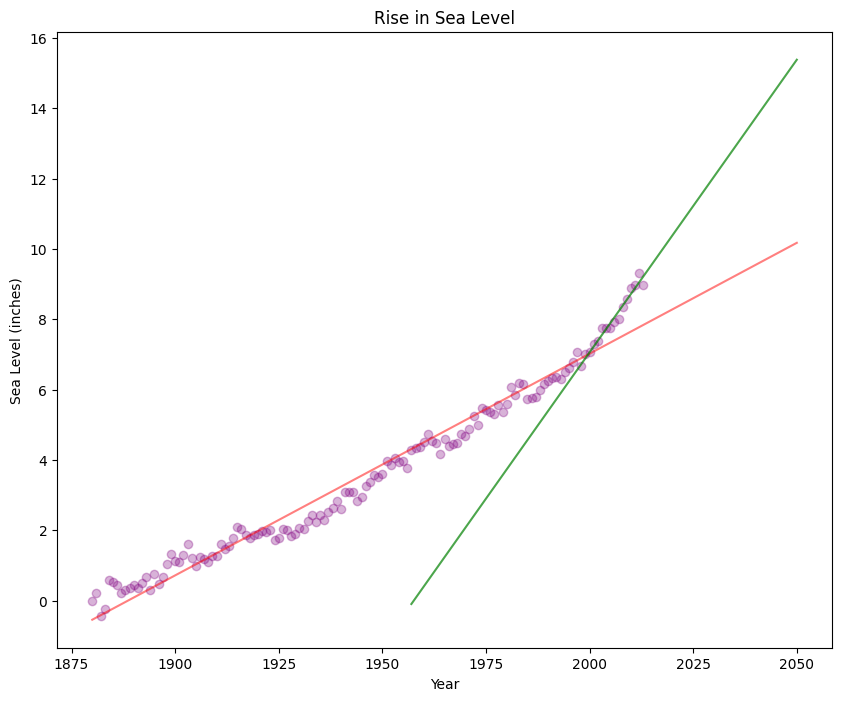

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], alpha=0.3, color='purple')
plt.plot(extended_years, reg_long.intercept + reg_long.slope * extended_years, 'r', alpha=0.5)
plt.plot(extended_years_short, reg_short.intercept + reg_short.slope * extended_years_short, 'green', alpha=0.7)


ax.set_ylabel('Sea Level (inches)')
ax.set_xlabel('Year')
ax.set_title('Rise in Sea Level')